In [2]:
from torchvision import transforms
from AHCRDataset import AHCRDataset
from TransposeAndOtsuThreshold import TransposeAndOtsuThreshold
from torch.utils.data import Dataset, DataLoader

train_images_path = './Data/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv'
train_labels_path = './Data/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv'

test_images_path = './Data/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv'
test_labels_path = './Data/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv'

transform = transforms.Compose([
    transforms.Lambda(lambda x: x.transpose(0, 1).transpose(1, 2)),
])


train_dataset = AHCRDataset(train_images_path, train_labels_path, transform=transform)
test_dataset = AHCRDataset(test_images_path, test_labels_path, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


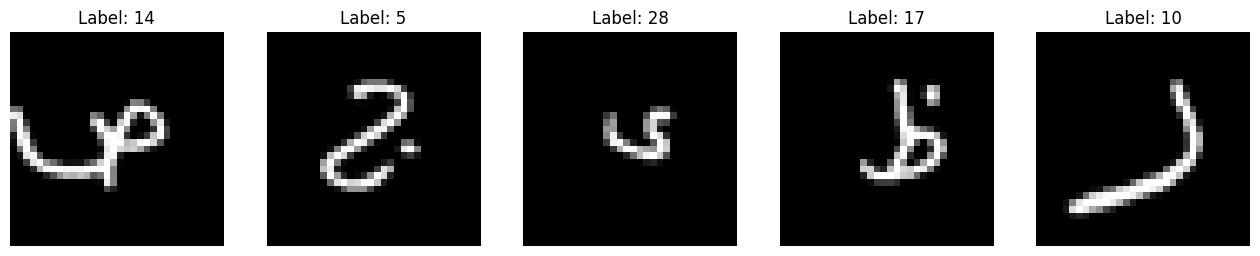

In [3]:
import matplotlib.pyplot as plt
import random
import torch

num_images = 5
img_size = (32, 32)  
fig, axes = plt.subplots(1, num_images, figsize=(16, 10))

for i in range(num_images):
    random_batch = random.choice([batch for batch in train_loader])
    images, labels = random_batch

    random_index = random.randrange(0, len(images))
    img = images[i].numpy().squeeze()
    label = labels[i].item()  

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Label: {label + 1}')
    axes[i].axis('off')

plt.show()


In [4]:
from BaselineCNN import BaselineCNN
from Trainer import Trainer
import torch.nn as nn

In [9]:
model = BaselineCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
trainer = Trainer(model, criterion, optimizer)
trainer.train(train_loader, test_loader, val_ratio=0.1, num_epochs=20)

Epoch 1/20, Train Loss: 1.8685, Train Acc: 80.93%, Test Loss: 0.7600, Test Acc: 75.74%, 
Epoch 2/20, Train Loss: 0.4843, Train Acc: 89.44%, Test Loss: 0.5736, Test Acc: 82.05%, 
Epoch 3/20, Train Loss: 0.2784, Train Acc: 94.32%, Test Loss: 0.4839, Test Acc: 85.51%, 
Epoch 4/20, Train Loss: 0.1657, Train Acc: 96.69%, Test Loss: 0.4692, Test Acc: 87.02%, 
Epoch 5/20, Train Loss: 0.1083, Train Acc: 97.08%, Test Loss: 0.4752, Test Acc: 86.79%, 
Epoch 6/20, Train Loss: 0.0916, Train Acc: 97.46%, Test Loss: 0.5518, Test Acc: 86.88%, 
Epoch 7/20, Train Loss: 0.0760, Train Acc: 98.11%, Test Loss: 0.4956, Test Acc: 88.01%, 
Epoch 8/20, Train Loss: 0.0525, Train Acc: 97.94%, Test Loss: 0.5543, Test Acc: 86.67%, 
Epoch 9/20, Train Loss: 0.0490, Train Acc: 97.94%, Test Loss: 0.5968, Test Acc: 87.35%, 
Epoch 10/20, Train Loss: 0.0685, Train Acc: 98.16%, Test Loss: 0.5905, Test Acc: 87.38%, 
Epoch 11/20, Train Loss: 0.0555, Train Acc: 98.64%, Test Loss: 0.5769, Test Acc: 88.42%, 
Epoch 12/20, Train 

In [11]:
train_accuracy = trainer.evaluate(train_loader)
test_accuracy = trainer.evaluate(test_loader)
print(f'Train Accuracy: {train_accuracy}%')
print(f'Test Accuracy: {test_accuracy}%')

Train Accuracy: 97.52232142857143%
Test Accuracy: 89.22619047619048%


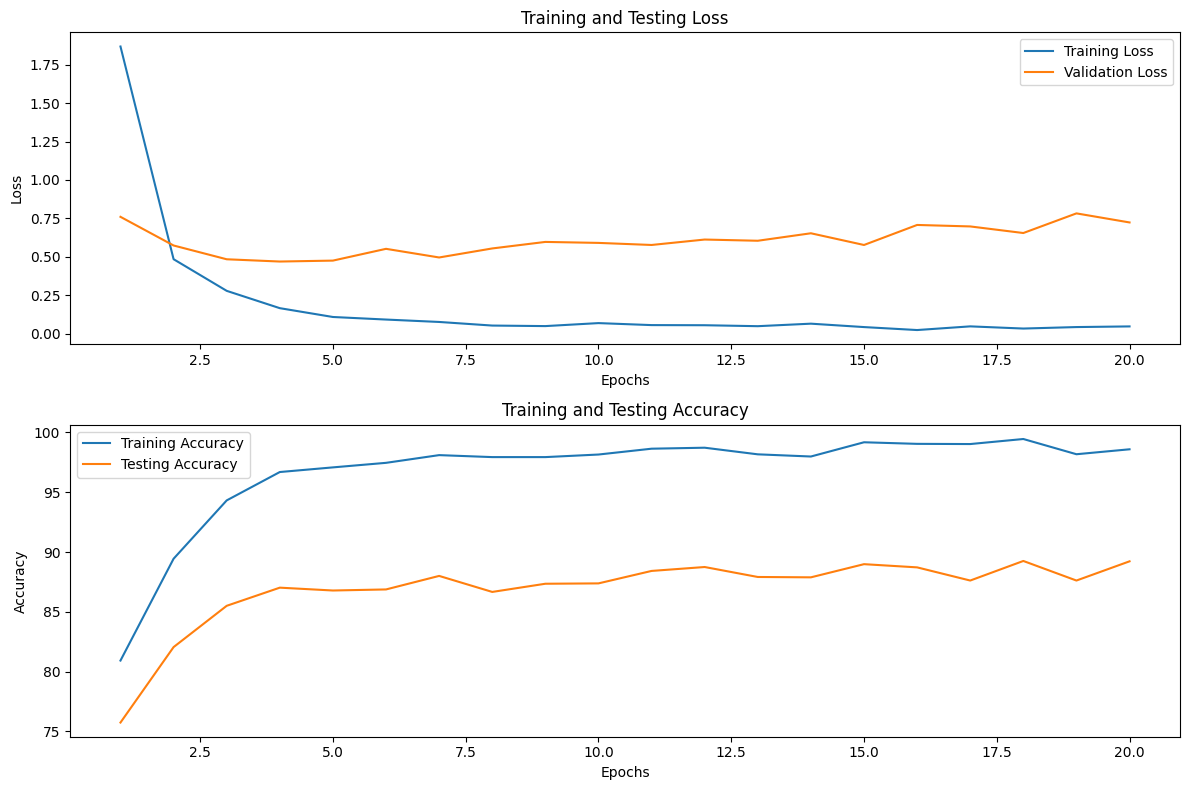

In [12]:
Trainer.plot_learning_curves(trainer)

In [13]:
from Paper2 import CustomCNN

In [14]:
model = CustomCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
trainer = Trainer(model, criterion, optimizer)
trainer.train(train_loader, test_loader, val_ratio=0.1, num_epochs=20)

Epoch 1/20, Train Loss: 1.3921, Train Acc: 85.96%, Test Loss: 0.4870, Test Acc: 83.99%, 
Epoch 2/20, Train Loss: 0.3295, Train Acc: 93.45%, Test Loss: 0.2995, Test Acc: 90.36%, 
Epoch 3/20, Train Loss: 0.1820, Train Acc: 96.66%, Test Loss: 0.2247, Test Acc: 92.83%, 
Epoch 4/20, Train Loss: 0.1230, Train Acc: 97.53%, Test Loss: 0.2111, Test Acc: 93.51%, 
Epoch 5/20, Train Loss: 0.1108, Train Acc: 98.12%, Test Loss: 0.1987, Test Acc: 93.87%, 
Epoch 6/20, Train Loss: 0.0837, Train Acc: 98.60%, Test Loss: 0.1947, Test Acc: 94.82%, 
Epoch 7/20, Train Loss: 0.0620, Train Acc: 98.72%, Test Loss: 0.2315, Test Acc: 94.49%, 
Epoch 8/20, Train Loss: 0.0606, Train Acc: 98.51%, Test Loss: 0.2610, Test Acc: 93.69%, 
Epoch 9/20, Train Loss: 0.0706, Train Acc: 98.33%, Test Loss: 0.2691, Test Acc: 93.12%, 
Epoch 10/20, Train Loss: 0.0480, Train Acc: 96.62%, Test Loss: 0.3514, Test Acc: 91.73%, 
Epoch 11/20, Train Loss: 0.0518, Train Acc: 98.97%, Test Loss: 0.2535, Test Acc: 94.43%, 
Epoch 12/20, Train 

In [16]:
train_accuracy = trainer.evaluate(train_loader)
test_accuracy = trainer.evaluate(test_loader)
print(f'Train Accuracy: {train_accuracy}%')
print(f'Test Accuracy: {test_accuracy}%')

Train Accuracy: 98.72767857142857%
Test Accuracy: 95.08928571428571%


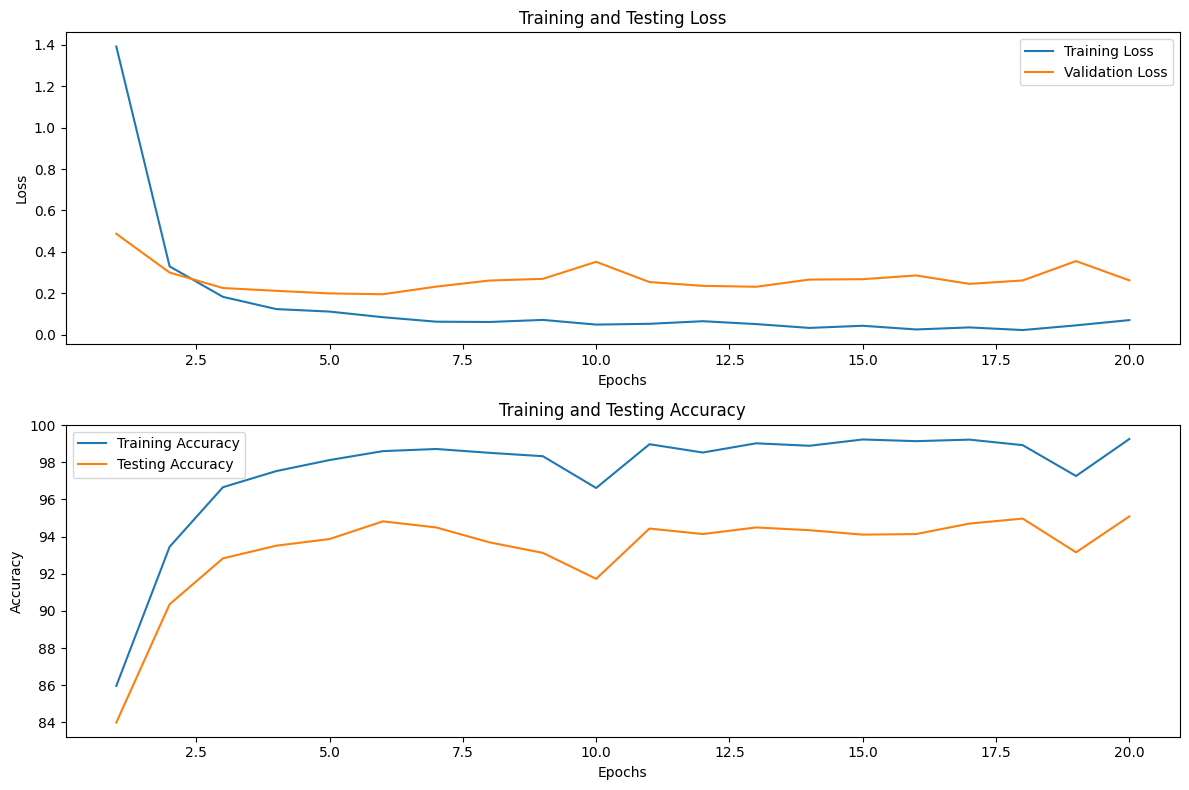

In [17]:
Trainer.plot_learning_curves(trainer)

In [18]:
from Paper1 import CNN14

In [21]:
model = CNN14()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
trainer = Trainer(model, criterion, optimizer)
trainer.train(train_loader, test_loader, val_ratio=0.1, num_epochs=20)

Epoch 1/20, Train Loss: 2.7610, Train Acc: 48.83%, Test Loss: 1.3685, Test Acc: 48.39%, 
Epoch 2/20, Train Loss: 0.8189, Train Acc: 85.09%, Test Loss: 0.4635, Test Acc: 84.67%, 
Epoch 3/20, Train Loss: 0.3547, Train Acc: 93.47%, Test Loss: 0.2800, Test Acc: 91.70%, 
Epoch 4/20, Train Loss: 0.1911, Train Acc: 96.59%, Test Loss: 0.1887, Test Acc: 94.08%, 
Epoch 5/20, Train Loss: 0.1469, Train Acc: 97.76%, Test Loss: 0.1752, Test Acc: 95.60%, 
Epoch 6/20, Train Loss: 0.1349, Train Acc: 97.27%, Test Loss: 0.2019, Test Acc: 94.76%, 
Epoch 7/20, Train Loss: 0.1218, Train Acc: 96.77%, Test Loss: 0.2607, Test Acc: 93.63%, 
Epoch 8/20, Train Loss: 0.1185, Train Acc: 97.40%, Test Loss: 0.1987, Test Acc: 94.73%, 
Epoch 9/20, Train Loss: 0.0867, Train Acc: 97.02%, Test Loss: 0.2210, Test Acc: 93.84%, 
Epoch 10/20, Train Loss: 0.0751, Train Acc: 98.75%, Test Loss: 0.1672, Test Acc: 95.89%, 
Epoch 11/20, Train Loss: 0.0801, Train Acc: 98.78%, Test Loss: 0.1865, Test Acc: 95.80%, 
Epoch 12/20, Train 

In [23]:
train_accuracy = trainer.evaluate(train_loader)
test_accuracy = trainer.evaluate(test_loader)
print(f'Train Accuracy: {train_accuracy}%')
print(f'Test Accuracy: {test_accuracy}%')

Train Accuracy: 98.50446428571429%
Test Accuracy: 96.01190476190476%


In [24]:
from Paper3 import ArabicCharCNN

In [27]:
model = ArabicCharCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0015)

In [ ]:
trainer = Trainer(model, criterion, optimizer)
trainer.train(train_loader, test_loader, val_ratio=0.1, num_epochs=30)

Epoch 1/30, Train Loss: 3.3342, Train Acc: 3.60%, Test Loss: 3.3324, Test Acc: 3.57%, 
Epoch 2/30, Train Loss: 3.3337, Train Acc: 3.63%, Test Loss: 3.3324, Test Acc: 3.57%, 
Epoch 3/30, Train Loss: 3.3336, Train Acc: 3.64%, Test Loss: 3.3326, Test Acc: 3.57%, 
Epoch 4/30, Train Loss: 3.3335, Train Acc: 3.64%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 5/30, Train Loss: 3.3334, Train Acc: 3.68%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 6/30, Train Loss: 3.3335, Train Acc: 3.63%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 7/30, Train Loss: 3.3334, Train Acc: 3.64%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 8/30, Train Loss: 3.3333, Train Acc: 3.61%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 9/30, Train Loss: 3.3340, Train Acc: 3.68%, Test Loss: 3.3324, Test Acc: 3.57%, 
Epoch 10/30, Train Loss: 3.3333, Train Acc: 3.68%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 11/30, Train Loss: 3.3333, Train Acc: 3.65%, Test Loss: 3.3325, Test Acc: 3.57%, 
Epoch 12/30, Train Loss: 3.3334, Train Ac

In [ ]:
train_accuracy = trainer.evaluate(train_loader)
test_accuracy = trainer.evaluate(test_loader)
print(f'Train Accuracy: {train_accuracy}%')
print(f'Test Accuracy: {test_accuracy}%')

In [32]:
import importlib

In [36]:
import Paper3
importlib.reload(Paper3)

<module 'Paper3' from '/home/ahmad/Desktop/CV/Computer-Vision-Project/Paper3.py'>

In [ ]:
for epoch in range(1):
    trainer.model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.unsqueeze(1).float(), labels.squeeze().long()
        trainer.optimizer.zero_grad()
        outputs = trainer.model(images)
        print(outputs.shape)
        print(labels.shape)
        print(images.shape)
        input()
        loss = trainer.criterion(outputs, labels)
        loss.backward()
        trainer.optimizer.step()
        total_loss += loss.item()

In [3]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.transpose(0, 1).transpose(1, 2)),
    transforms.RandomRotation(degrees=(-10, 10)),  
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)), 
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.GaussianBlur(kernel_size=3), 
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), 
])



train_dataset = AHCRDataset(train_images_path, train_labels_path, transform=transform)
test_dataset = AHCRDataset(test_images_path, test_labels_path, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
import torch
model = BaselineCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
trainer = Trainer(model, criterion, optimizer)
trainer.train(train_loader, test_loader, val_ratio=0.1, num_epochs=10)

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [63]:
train_accuracy = trainer.evaluate(train_loader)
test_accuracy = trainer.evaluate(test_loader)
print(f'Train Accuracy: {train_accuracy}%')
print(f'Test Accuracy: {test_accuracy}%')

Train Accuracy: 93.97321428571429%
Test Accuracy: 82.73809523809524%
